# HW2: Inception network 구현
## Due: 9/27 15:30

[Inception network](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)는 Inception module 여러개로 구성된 모델이다. 다음 그림을 참고하여 Inception network를 구현하시오.

- **채점 기준**
  - Inception module을 잘 구현해야 한다.
  - 아래의 표에 있는 대로 architecture를 구현해야 한다. (논문과 약간 다르게 auxiliary classifier 등이 생략되어 있다)
  - 아래의 **표에 있는 대로 hyperparameter(filter size, stride, filter 수)를 설정**해야 하고, 각 layer 및 module의 **output size가 표와 같게 나와야 한다.**
  - test accuracy가 **65% 이상** 나와야 한다.
 
- **제출**
  - 주피터 파일 제출 (output 지우지 말아 주세요)

### Inception module

- `strides`는 모두 1로 설정해야 output size가 맞게 나올 것이다.



<img src="https://user-images.githubusercontent.com/37704174/108797724-369ef800-75cf-11eb-987a-926657daf61e.JPG" width="400" height="400"/>  



### Inception network architecture
- 아래의 표에 있는대로 구성을 하면 이러한 구조의 모델이 만들어진다.

<img src="https://user-images.githubusercontent.com/37704174/108797713-2dae2680-75cf-11eb-8593-5a1bf50549da.png" width="400" height="400"/>  

### specification


<img src="https://user-images.githubusercontent.com/37704174/109782740-8d9a7200-7c4c-11eb-9999-d859b67dc468.JPG" width="600" height="600"/>  

- 이 표에 있는 대로 위에서부터 layer 및 Inception module을 쌓아야 한다.
- 모든 `Conv2D`와 `MaxPool2D`의 padding 옵션은 `same`으로 설정해야 output size가 올바르게 나올 것이다.
- 표 3행을 보면 convolution의 depth가 2이다. 이것은 `Conv2D` layer가 2개 있다는 뜻이고, 각각의 filter의 수는 64, 192로 설정해야 한다.
- Inception module의 hyperparameter 설명
  - #1x1: 맨 왼쪽 1x1 convolution layer의 filter 수
  - #3x3 reduce: 3x3 convolution layer 이전에 나오는 1x1 convolution layer의 filter 수
  - #3x3: 3x3 convolution layer의 filter 수
  - #5x5 reduce: 5x5 convolution layer 이전에 나오는 1x1 convolution layer의 filter 수
  - #5x5: 5x5 convolution layer의 filter 수
  - pool proj: max pooling 다음에 나오는 1x1 convolution layer의 filter 수

### 사용할 모듈 import

In [1]:
import tensorflow as tf
### 자유롭게 import

### Inception module 구현


In [3]:
def InceptionModule(inputs, f_1x1, f_3x3_r, f_3x3, f_5x5_r, f_5x5, f_pool):
    '''
    inputs: Inception module의 인풋
    f_ : 위의 표에 나와있는 filter 수
    
    '''
    
    
    outputs = # use tf.keras.layers.concatenate
    
    return outputs

### Inception network 구현

In [4]:
def InceptionNet():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    '''
    표에 있는 대로 모델을 만들어 주세요
    '''

    
    outputs = 
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [5]:
my_inception = InceptionNet()

### 모델 summary

아래 셀을 실행 했을 때, 표의 각각에 해당하는 output size가 맞게 나와야 한다.

In [ ]:
my_inception.summary()

### training data (아래 셀 수정 금지)

아래의 데이터를 이용한다.

In [7]:
# DO NOT MODIFY

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.1)

### data preprocessing

원하는 대로 데이터를 전처리 해주면 된다.

In [ ]:
# data preprocessing (ex normalize...)

### model compile

optimizer, loss function을 알맞게 설정한다.

In [8]:
my_inception.compile( ...  )

### model training

hyperparameter를 적절히 설정한다. (epochs 등..)

In [ ]:
hist = my_inception.fit(x=x_train, 
                        y=y_train, 
                        validation_data=(x_valid, y_valid)
                        # your hyperparameters...
                        )

### 참고용

조교가 학습한 모델의 validation accuracy를 그래프로 나타내 보았다.

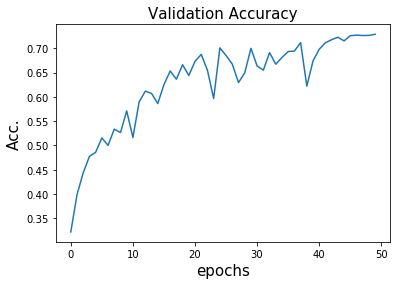

In [18]:
import matplotlib.pyplot as plt

plt.plot(hist.history['val_accuracy'])
plt.title('Validation Accuracy', fontsize=15)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('Acc.', fontsize=15)

plt.show()

## Test Accuracy

test accuracy 측정 결과 **65% 이상**이 나와야 한다.

In [ ]:
my_inception.evaluate(x_test, y_test)